In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Netflix/netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
df.dropna(inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [19]:
df['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'International TV',
       'Documentaries', 'Independent Movies', 'Comedies', 'Sci-Fi',
       'International Movies', 'Children', 'TV Shows', 'Uncategorized',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'Anime Series', 'Kids', 'Docuseries', 'Crime TV',
       'British TV', 'Cult Movies', 'TV Action', 'Romantic TV',
       'TV Horror', 'Romantic Movies', 'TV Comedies', 'Classic',
       'Reality TV', 'LGBTQ Movies'], dtype=object)

In [5]:
pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
top_10 = df.groupby('genre')['duration'].mean().nlargest(10)
top_10

genre
Classic Movies                       118.43
Action                               113.16
International Movies                 112.24
Dramas                               111.80
Sci-Fi                               108.09
Comedies                             107.18
Cult Movies                          103.64
LGBTQ Movies                          99.00
Independent Movies                    98.70
Thrillers                             97.24
Name: duration, dtype: float64

In [10]:
least_10 = df.groupby('genre')['duration'].mean().nsmallest(10)
least_10

genre
Romantic TV                        1.00
TV Shows                           1.00
Docuseries                         1.14
International TV                   1.41
Kids                               1.50
Crime TV                           1.70
Reality TV                         2.00
British TV                         2.55
Anime Series                       2.67
TV Horror                          3.00
Name: duration, dtype: float64

The analysis done above shows that Genre with genre as Classic Movies tend to have more duration on average. On the other hand, Genre that belong to the Romantic TV tend to have the least engagement on Netflix. The top 10 and least 10 categories of Genres have been listed above. We can visualize this using a barchart.

In [12]:
top_duration = pd.DataFrame(top_10)
least_duration = pd.DataFrame(least_10)
top_duration

,duration
genre,
Classic Movies,118.43
Action,113.16
International Movies,112.24
Dramas,111.80
Sci-Fi,108.09
Comedies,107.18
Cult Movies,103.64
LGBTQ Movies,99.00
Independent Movies,98.70


In [13]:
top_duration.index

Index(['Classic Movies', 'Action', 'International Movies', 'Dramas', 'Sci-Fi',
       'Comedies', 'Cult Movies', 'LGBTQ Movies', 'Independent Movies',
       'Thrillers'],
      dtype='object', name='genre')

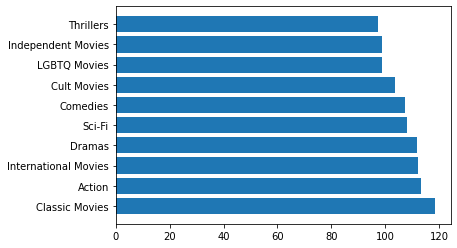

In [17]:
plt.barh(top_duration.index,top_duration['duration'])
plt.show()

Let's select any 2 random categories and test if the difference in the average duraiton for the Movie is due to how the data was sampled and isn't representative of the actual data. To verify this, we need to use A/B testing.
<br>
First we create a dataframe consisting of only those Duraiton that belong to either Action or Children category.

In [20]:
filt = (df['genre'] == 'Action') | (df['genre'] == 'Children')
df = df[filt]
df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,128,"A taxi driver, a gangster and an athlete strug...",Action
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,93,"Aiming to hasten an uprising, the leader of an...",Action
50,s51,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",United States,"June 1, 2019",2008,109,Fierce mammoth hunter D'Leh sets out on an imp...,Action
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...",Hong Kong,"April 3, 2019",2010,113,"In the age of the Ming Dynasty, Quinglong is t...",Action
...,...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,88,When a father of eight and a mother of 10 prep...,Children
7761,s7762,Movie,Zapped,Peter DeLuise,"Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",Canada,"February 1, 2017",2014,92,A girl discovers a dog-training app that can g...,Children
7772,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,"July 1, 2017",2016,105,"At Christmas, Zip and Zap take a trip with the...",Children
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,104,"When his cruel uncle abandons him, a young orp...",Children


In [21]:
Action_df = df[df['genre'] == 'Action']['duration']
Children_df = df[df['genre'] == 'Children']['duration']

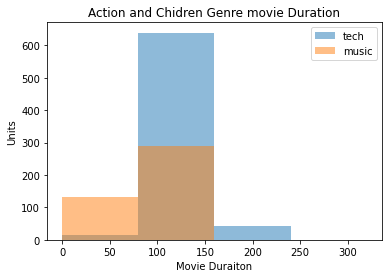

In [26]:
plt.hist(Action_df, alpha=0.5, bins=np.arange(0, 350, 80), label='tech')
plt.hist(Children_df, alpha=0.5, bins=np.arange(0, 350, 80), label='music')
plt.title("Action and Chidren Genre movie Duration")
plt.ylabel("Units")
plt.xlabel("Movie Duraiton")
plt.legend()
plt.show()

In [27]:
avg_diff = Action_df.mean() - Children_df.mean()
avg_diff

29.913390395063757

In [40]:
shuffled = df.sample(10, replace = False)
shuffled

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6328,s6329,Movie,The End,Mohammed Alhmly,"Mohamed El Hemaly, Abdulla Al-khudr, Ghadeer Z...",Kuwait,"May 17, 2020",2019,97,A wrongly accused man is pursued by a dogged i...,Action
4192,s4193,Movie,"Monster High: Frights, Camera, Action!",William Lau,"Sue Swan, Kate Higgins, Celeste Henderson, Mar...",United States,"January 1, 2018",2014,74,Draculaura is whisked to Transylvania to be cr...,Children
3382,s3383,Movie,Kill the Irishman,Jonathan Hensleigh,"Ray Stevenson, Vincent D'Onofrio, Val Kilmer, ...",United States,"August 21, 2020",2011,106,This true crime tale charts the rise and fall ...,Action
1414,s1415,Movie,Cleopatra Jones,Jack Starrett,"Tamara Dobson, Bernie Casey, BrendaSykes, Esth...",United States,"November 1, 2019",1973,89,A stylin' special agent chases down drug lords...,Action
5384,s5385,Movie,Santa's Apprentice,Luc Vinciguerra,"Julie Gayet, Jean-Pierre Marielle, Lorànt Deut...",Australia,"December 20, 2015",2010,72,Young orphan Nicolas learns how to guide a sle...,Children
518,s519,Movie,Angel Has Fallen,Ric Roman Waugh,"Gerard Butler, Morgan Freeman, Nick Nolte, Dan...",United States,"April 4, 2020",2019,121,Secret Service agent Mike Banning is caught in...,Action
6892,s6893,Movie,The Spiderwick Chronicles,Mark Waters,"Freddie Highmore, Mary-Louise Parker, Sarah Bo...",United States,"March 1, 2019",2008,97,When city-raised twins move to a tumbledown co...,Children
3530,s3531,Movie,Larceny,R. Ellis Frazier,"Dolph Lundgren, Corbin Bernsen, Louis Mandylor...",United States,"September 15, 2017",2017,87,An ex-CIA contractor turned thief is forced to...,Action
6014,s6015,Movie,Teenage Mutant Ninja Turtles II: The Secret of...,Michael Pressman,"Paige Turco, David Warner, Mark Caso, Michelan...",United States,"January 1, 2020",1991,88,The evil Shredder decides that ooze is what gi...,Children
3464,s3465,Movie,Kung Fu Hustle,Stephen Chow,"Stephen Chow, Yuen Wah, Yuen Qiu, Lam Chi-chun...",Hong Kong,"April 1, 2020",2004,99,"Sing, a mobster in 1940s China, longs to be as...",Action
